In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/FoDS-2021/data/salaries.csv')

In [ ]:
data.head(10)

,salary
0,96454
1,29557
2,47175
3,12419
4,33333333
5,90938
6,76404
7,85815
8,9999999
9,73611


In [ ]:
from numpy import mean
from numpy import std
data_mean,data_std=mean(data['salary']),std(data['salary'])

In [ ]:
data_mean

349050.10216666665

In [ ]:
data_std

4758049.22084576

In [ ]:
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [ ]:
lower

-13925097.560370613

In [ ]:
upper

14623197.764703948

In [ ]:
outliers = [x for x in data['salary'] if (x < lower) or (x > upper)]

In [ ]:
outliers

[33333333,
 66666666,
 88888888,
 99999999,
 66666666,
 99999999,
 55555555,
 66666666,
 22222222,
 22222222,
 55555555,
 88888888,
 99999999,
 66666666,
 55555555,
 33333333,
 99999999,
 55555555,
 55555555,
 55555555,
 99999999,
 88888888,
 99999999,
 55555555,
 99999999]

In [ ]:
non_outliers = [x for x in data['salary'] if (x > lower) and (x < upper)]

In [ ]:
len(non_outliers)

5975

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


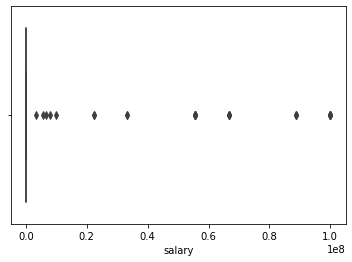

In [ ]:
import seaborn as sns
sns.boxplot(data['salary'])

# IQR

In [ ]:
import numpy as np
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25

In [ ]:
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [ ]:
outliers = [x for x in data['salary'] if (x < lower) or (x > upper)]

In [ ]:
len(outliers)

30

# isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(data[['salary']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
data['scores']=model.decision_function(data[['salary']])
data['anomaly']=model.predict(data[['salary']])
data.head(10)

,salary,scores,anomaly
0,96454,-0.004593,-1
1,29557,0.045192,1
2,47175,0.064021,1
3,12419,-0.020330,-1
4,33333333,-0.257110,-1
5,90938,0.024987,1
6,76404,0.081148,1
7,85815,0.064989,1
8,9999999,-0.160384,-1
9,73611,0.077334,1


# Local outlier factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
model=LocalOutlierFactor(novelty=True)
model.fit(data[['salary']])

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=True, p=2)

In [ ]:
data['scores']=model.decision_function(data[['salary']])
data['anomaly']=model.predict(data[['salary']])
data.head(10)

,salary,scores,anomaly
0,96454,0.492574,1
1,29557,0.466587,1
2,47175,0.399883,1
3,12419,0.522965,1
4,33333333,-42737.796378,-1
5,90938,0.461231,1
6,76404,0.491208,1
7,85815,0.451803,1
8,9999999,-45681.603049,-1
9,73611,0.495589,1


# minimum covariant

In [ ]:
from sklearn.covariance import EllipticEnvelope
# identify outliers in the training dataset
model=EllipticEnvelope(contamination=0.01)
model.fit(data[['salary']])

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
                 store_precision=True, support_fraction=None)

In [ ]:
data['scores']=model.decision_function(data[['salary']])
data['anomaly']=model.predict(data[['salary']])
data.head(10)

,salary,scores,anomaly
0,96454,4.154096e-01,1
1,29557,2.028884e+00,1
2,47175,2.892497e+00,1
3,12419,3.047670e-01,1
4,33333333,-1.643630e+06,-1
5,90938,1.050950e+00,1
6,76404,2.293030e+00,1
7,85815,1.560318e+00,1
8,9999999,-1.467877e+05,-1
9,73611,2.459896e+00,1


# one class SVM

In [ ]:
from sklearn.svm import OneClassSVM
# identify outliers in the training dataset
model=OneClassSVM(nu=0.01)
model.fit(data[['salary']])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.01, shrinking=True, tol=0.001, verbose=False)

In [ ]:
data['scores']=model.decision_function(data[['salary']])
data['anomaly']=model.predict(data[['salary']])
data.head(10)

,salary,scores,anomaly
0,96454,0.029090,1
1,29557,0.008111,1
2,47175,0.014739,1
3,12419,0.000907,1
4,33333333,-29.085615,-1
5,90938,0.027790,1
6,76404,0.023996,1
7,85815,0.026514,1
8,9999999,-27.751652,-1
9,73611,0.023205,1
